In [1]:
# Importing essential libraries
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Preprocessing the Training set

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Importing Training set
training_set = train_datagen.flow_from_directory('/Users/jaydemirandilla/VS_DeepLearning/Cats&Dogs/archive/training_set/training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 8005 images belonging to 2 classes.


In [3]:
# Preprocessing the Test set

# Feature Scaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Importing Test set
test_set = test_datagen.flow_from_directory('/Users/jaydemirandilla/VS_DeepLearning/Cats&Dogs/archive/test_set/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2023 images belonging to 2 classes.


In [4]:
# Importing essential libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [5]:
# Initialising the CNN
cnn = Sequential()
# Step 1 - Add Convolution Layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))   
# Step 2 - Add Pooling Layer
cnn.add(MaxPool2D(pool_size=2, strides=2))
# Add second onvolutional layer with pooling
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))
# Step 3 - Add Flattening Layer
cnn.add(Flatten())
# Step 4 - Add Full Connected Layer
cnn.add(Dense(units=128, activation='relu'))
# Step 5 - Add Output Layer
cnn.add(Dense(units=1, activation='sigmoid'))

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:

# Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Training the CNN on the Training set and evaluating it on the Test set
model_history = cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25


/opt/homebrew/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - accuracy: 0.5355 - loss: 0.7007 - val_accuracy: 0.6747 - val_loss: 0.6081
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.6591 - loss: 0.6172 - val_accuracy: 0.7108 - val_loss: 0.5631
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7122 - loss: 0.5675 - val_accuracy: 0.7420 - val_loss: 0.5327
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.7309 - loss: 0.5363 - val_accuracy: 0.7029 - val_loss: 0.5946
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.7435 - loss: 0.5071 - val_accuracy: 0.7227 - val_loss: 0.5724
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.7636 - loss: 0.4760 - val_accuracy: 0.7662 - val_loss: 0.5054
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.7744 - loss: 0.4718 - val_accuracy: 0.7543 - val_loss: 0.5438
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.7824 - loss: 0.4546 - val_accurac

In [9]:
# Importing essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
     

In [10]:
# List all data in history
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


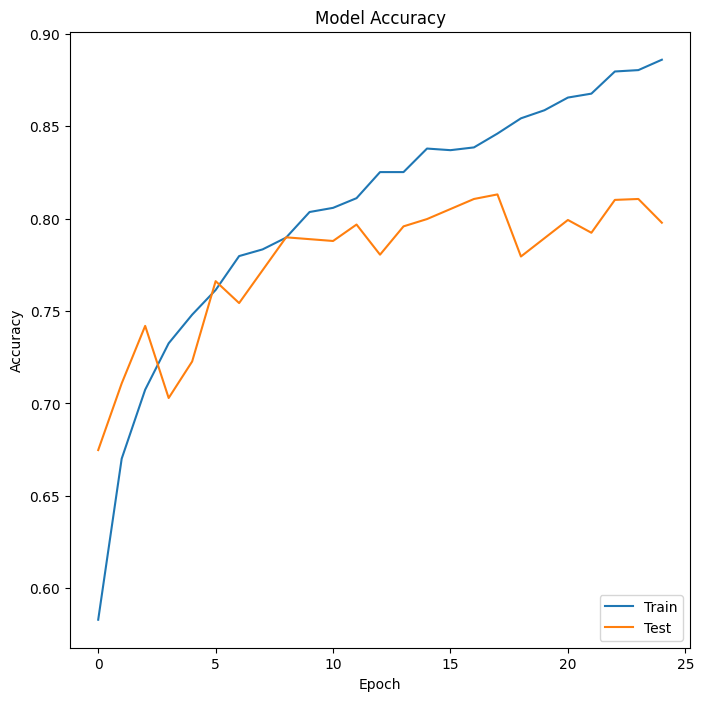

In [11]:

# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
     

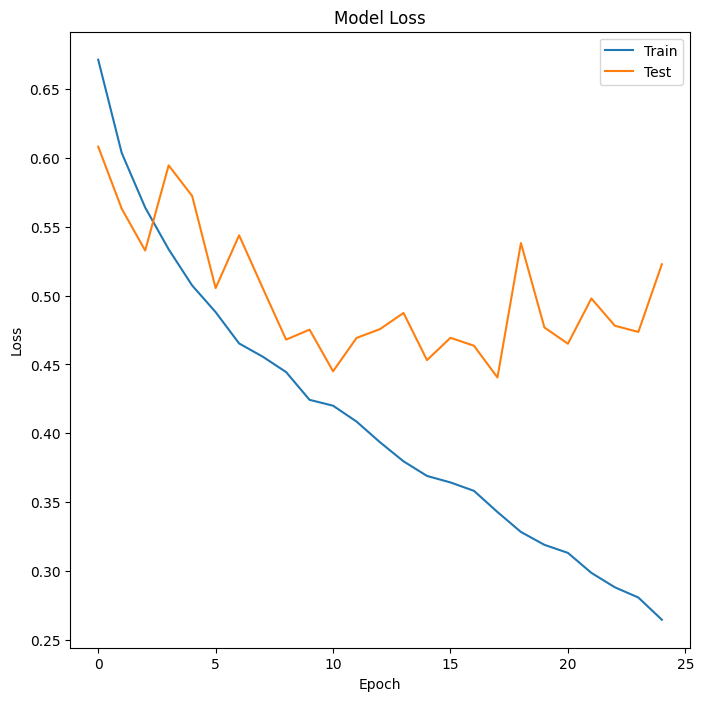

In [12]:

# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [13]:

# Importing essential libraries
import numpy as np
from keras.preprocessing import image

In [14]:
test_image = image.load_img('/Users/jaydemirandilla/VS_DeepLearning/Cats&Dogs/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Prediction: It's a Dog's image.


In [15]:

test_image = image.load_img('/Users/jaydemirandilla/VS_DeepLearning/Cats&Dogs/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction: It's a Dog's image.


In [16]:
test_image = image.load_img('/Users/jaydemirandilla/VS_DeepLearning/Cats&Dogs/single_prediction/cat_or_dog_3.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction: It's a Cat's image.


In [17]:
test_image = image.load_img('/Users/jaydemirandilla/VS_DeepLearning/Cats&Dogs/single_prediction/cat_or_dog_4.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Prediction: It's a Cat's image.
